# Implementation of Ehrenfeucht–Fraïssé game logic applied to a set of strings

See post: https://medium.com/the-quantastic-journal/what-you-cant-ask-cognitive-limits-and-the-emergence-of-logic-d6f82f1b3eb3

# Basic Ehrenfeucht–Fraïssé game

This looks for partial isomorphisms between structures, with 4 basic atomic relations

One
Succ
First
Last -> all related to positions in the string

Optionally add 0-ary Parity relation

See src/ef_game for implementation details

In [9]:
import sys
sys.path.append("..")
from src.ef_game import *
from src.utils import *


**Example: consider two strings, print the winner**

In [10]:
s_even = "1101"  # two 1's :even
s_odd  = "0011"  # three 1's : odd

A_fo  = string_structure(s_even, include_parity_0ary=False)
B_fo  = string_structure(s_odd,  include_parity_0ary=False)

kk = 1
winner = ef_game_basic(A_fo, B_fo, k=kk, rounds=kk)
print(f"FO (no parity), k={kk}, rounds={kk} ->", winner)

A_mod = string_structure(s_even, include_parity_0ary=True)
B_mod = string_structure(s_odd,  include_parity_0ary=True)

print("Toy FO+MOD2 (with 0-ary parity), k=1, rounds=1 ->", ef_game_basic(A_mod, B_mod, k=kk, rounds=kk))


FO (no parity), k=1, rounds=1 -> Duplicator
Toy FO+MOD2 (with 0-ary parity), k=1, rounds=1 -> Spoiler


# Modified EF Game

Duplicator wins if it has at least one potential strategy. However, there is an option to stochastically limit the states it can explore (max_states). This offers some flexibility in varying the logical power of this EF game

Some tests

In [8]:

A = string_structure("11001",include_parity_0ary=False)
B = string_structure("10101",include_parity_0ary=False)

kk = 3
# # Run EF game with full power
winner_deterministic = ef_game(A, B, k=kk, rounds=kk,max_states=None,spoiler_samples=None)  

# # Now simulate a weak brain with stochastic strategy and memory limits
print('Winner Modified Game:', ef_game(A, B, k=kk, rounds=kk, max_states = 1, spoiler_samples = None, seed=None))  # Probabilistic

print('Winner Basic EF game: ', winner_deterministic)

Winner Modified Game: Spoiler
Winner Basic EF game:  Duplicator


### Graph analysis

Use some graphs to analyze the similarity structure created by the EF game

If the EG game determines that two strings are equivalent, then those strings will be connected by an edge

Test three different toy-brains

In [4]:

# Generate all n-bit strings
bit_strings = ['{:04b}'.format(i) for i in range(16)]
all_strings = bit_strings.copy()
kk = 2 # higher k makes spoiler more powerful
# Compute matrices for the 3 brain types
matrix_unlimited_fo = ef_equivalence_matrix(bit_strings, k=kk, rounds=kk, max_states=None, spoiler_samples=None) #unlimited duplicator (not powerful brain)
matrix_limited = ef_equivalence_matrix(bit_strings, k=kk, rounds=kk, max_states=1, spoiler_samples=None) # limited duplicator (more powerful brain)
matrix_unlimited_mod2 = ef_equivalence_matrix(bit_strings, k=kk, rounds=kk, max_states=None,include_parity=True) # most powerful brain




**check the graph degree of some strings for each toy-mind**

In [5]:
index_lookup = {s: i for i, s in enumerate(bit_strings)}

# Convert the 9 strings into index list
subset_indices = [index_lookup[s] for s in all_strings]

# Slice the full matrices
sub_limited = matrix_limited[np.ix_(subset_indices, subset_indices)]
sub_unlimited_fo = matrix_unlimited_fo[np.ix_(subset_indices, subset_indices)]
sub_unlimited_mod2 = matrix_unlimited_mod2[np.ix_(subset_indices, subset_indices)]

print("Limited Brain (FO, bounded memory)")
cluster_by_degree(sub_limited, all_strings)
print("\nUnlimited FO Brain")
cluster_by_degree(sub_unlimited_fo, all_strings)
print("\nUnlimited FO+MOD2 Brain")
cluster_by_degree(sub_unlimited_mod2, all_strings)


Limited Brain (FO, bounded memory)
Degree -> Strings
 0 -> 0000
 3 -> 1000
 5 -> 1001, 1100, 1101, 1111
 6 -> 0011, 0111
 7 -> 0001, 0010, 1010
 8 -> 0100, 0101, 0110, 1011, 1110

Unlimited FO Brain
Degree -> Strings
 0 -> 0000
 9 -> 0001, 0010, 0011, 0100, 0101, 0110, 1000, 1001, 1010, 1100
10 -> 0111, 1011, 1101, 1110, 1111

Unlimited FO+MOD2 Brain
Degree -> Strings
 0 -> 0000
 5 -> 0011, 0101, 0110, 1001, 1010, 1100
 6 -> 0001, 0010, 0100, 0111, 1000, 1011, 1101, 1110, 1111


**The following plots show the number of nodes with a certain degree - more powerful brain: lower "confusion" (i.e. connectivity)**

**As expected, the more powerful brains can distinguish more strings (lower overall degree counts)**

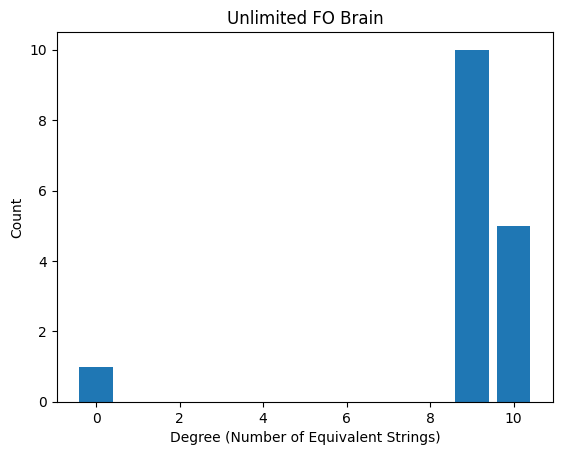

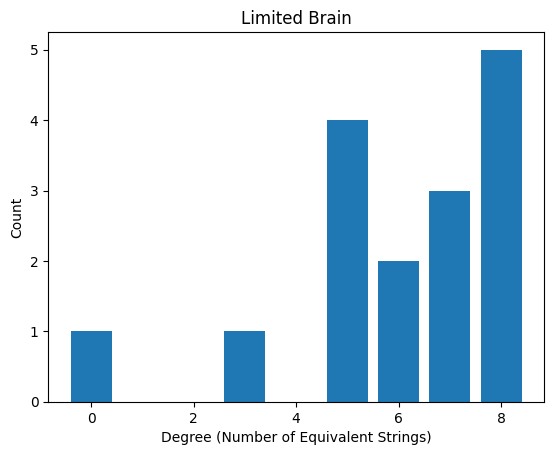

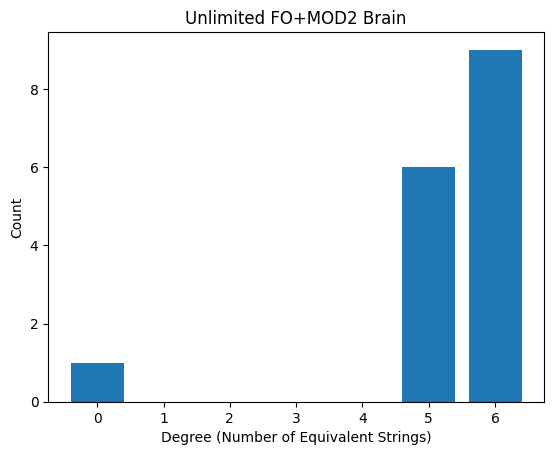

In [6]:
plot_degree_histogram(sub_unlimited_fo, all_strings, "Unlimited FO Brain") 
plot_degree_histogram(sub_limited, all_strings, "Limited Brain")
plot_degree_histogram(sub_unlimited_mod2, all_strings, "Unlimited FO+MOD2 Brain")


### EF Graph: connected strings are not distinguishable according to that Brain

Plotting degree by Color and Position

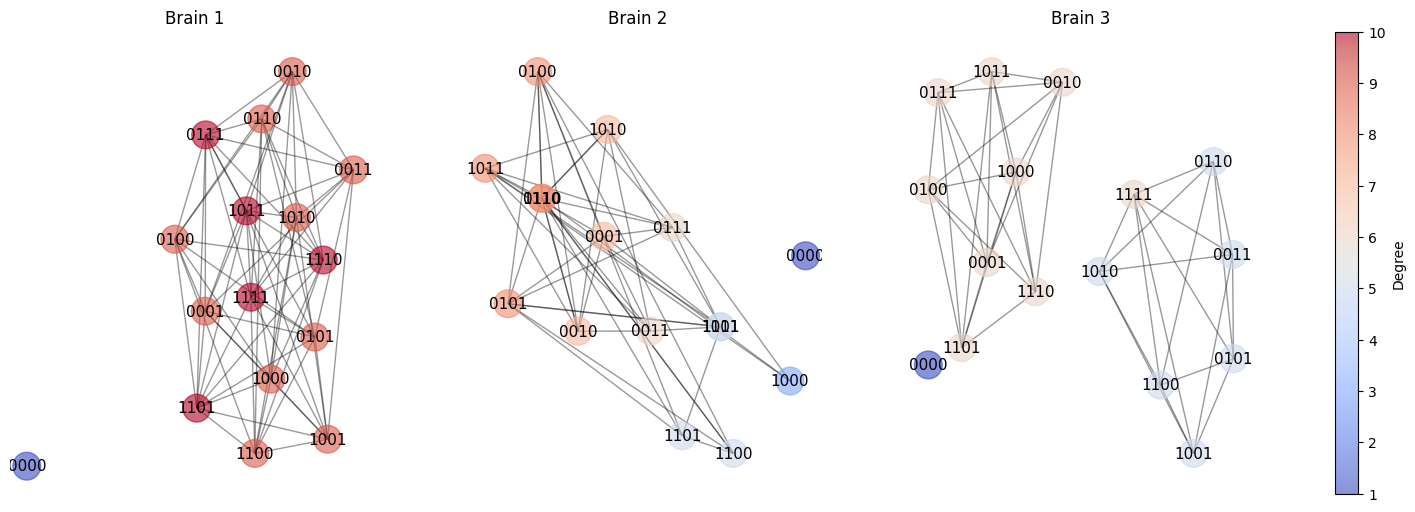

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
vmn, vmx = 1, 10

nodes1 = plot_clustered_graph(axes[0], matrix_unlimited_fo, bit_strings, "Brain 1", vmn, vmx, use_tsn=False)
nodes2 = plot_clustered_graph(axes[1], matrix_limited, bit_strings, "Brain 2", vmn, vmx, use_tsn=True)
nodes3 = plot_clustered_graph(axes[2], matrix_unlimited_mod2, bit_strings, "Brain 3", vmn, vmx, use_tsn=False)

# Add a single colorbar for all subplots
fig.colorbar(nodes3, ax=axes, label='Degree', fraction=0.05, pad=0.05)
# plt.tight_layout()
plt.show()